In [63]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [64]:
# Load and open the file containing the data
myFile = h5py.File('data-Mini Project 2.h5', 'r+')

# List all groups in the .h5 file
print(f"Keys: {myFile.keys()}")

Keys: <KeysViewHDF5 ['trX', 'trY', 'tstX', 'tstY']>


In [65]:
# print the information about the keys in the data
for key in myFile.keys():
    print(myFile[key])

<HDF5 dataset "trX": shape (3000, 150, 3), type "<f8">
<HDF5 dataset "trY": shape (3000, 6), type "<f8">
<HDF5 dataset "tstX": shape (600, 150, 3), type "<f8">
<HDF5 dataset "tstY": shape (600, 6), type "<f8">


In [66]:
# Extract the data from the file as numpy arrays

n1 = myFile.get('trX')
trX = np.array(n1)
print(f"trX shape: {trX.shape}, dtype: {trX.dtype}")

n1 = myFile.get('trY')
trY = np.array(n1)
print(f"trY shape: {trY.shape}, dtype: {trY.dtype}")

n1 = myFile.get('tstX')
tstX = np.array(n1)
print(f"tstX shape: {tstX.shape}, dtype: {tstX.dtype}")

n1 = myFile.get('tstY')
tstY = np.array(n1)
print(f"tstY shape: {tstY.shape}, dtype: {tstY.dtype}")

trX shape: (3000, 150, 3), dtype: float64
trY shape: (3000, 6), dtype: float64
tstX shape: (600, 150, 3), dtype: float64
tstY shape: (600, 6), dtype: float64


In [67]:
# add the average of each example for each sensor over 150 time steps as the 151st time step
trX = np.concatenate((trX, np.mean(trX, axis=1, keepdims=True)), axis=1)
print(f"trX shape: {trX.shape}, dtype: {trX.dtype}")

tstX = np.concatenate((tstX, np.mean(tstX, axis=1, keepdims=True)), axis=1)
print(f"tstX shape: {tstX.shape}, dtype: {tstX.dtype}")


trX shape: (3000, 151, 3), dtype: float64
tstX shape: (600, 151, 3), dtype: float64


In [68]:
# print the start and stop indexes of the trY data for each class
print("Class distribution in the training data:")
for i in range(6):
    print(f"Class {i}: {np.where(myFile['trY'][:,i] == 1)[0][0]} - {np.where(myFile['trY'][:,i] == 1)[0][-1]}")

Class distribution in the training data:
Class 0: 0 - 499
Class 1: 500 - 999
Class 2: 1000 - 1499
Class 3: 1500 - 1999
Class 4: 2000 - 2499
Class 5: 2500 - 2999


In [69]:
# print the start and stop indexes of the tstY data for each class
print("Class distribution in the test data:")
for i in range(6):
    print(f"Class {i}: {np.where(myFile['tstY'][:,i] == 1)[0][0]} - {np.where(myFile['tstY'][:,i] == 1)[0][-1]}")

Class distribution in the test data:
Class 0: 0 - 99
Class 1: 100 - 199
Class 2: 200 - 299
Class 3: 300 - 399
Class 4: 400 - 499
Class 5: 500 - 599


##### trX 
- The training input data.
- It is of shape (3000, 150, 3) which corresponds to: 3000 examples, 150 time steps, 3 sensors

##### trY
- The training output labels
- It is of shape (3000, 6) which corresponds to: 3000 examples, for each example, a one-hot vector with 6 classes
- There is 500 examples of each

##### tstX 
- The test input data.
- It is of shape (600, 150, 3) which corresponds to: 600 examples, 150 time steps, 3 sensors

##### tstY
- The test output labels
- It is of shape (600, 6) which corresponds to: 600 examples, for each example, a one-hot vector with 6 classes

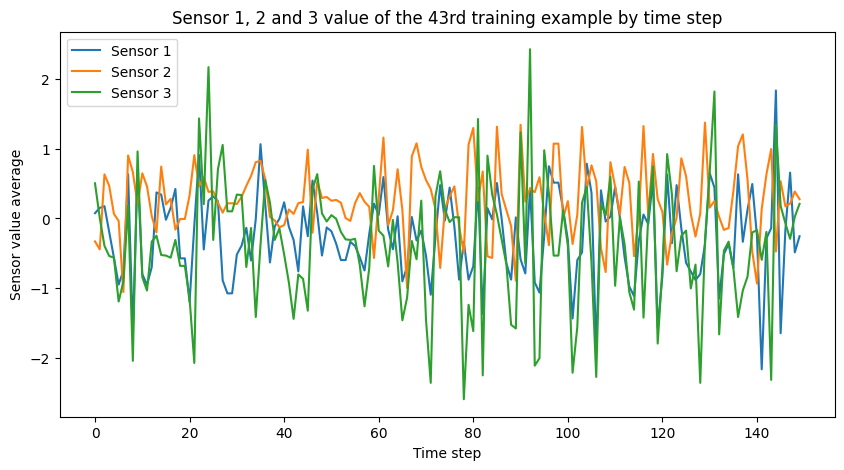

In [70]:
plt.figure(figsize=(10,5))
plt.plot(myFile['trX'][42][:,0])
plt.plot(myFile['trX'][42][:,1])
plt.plot(myFile['trX'][42][:,2])
plt.title("Sensor 1, 2 and 3 value of the 43rd training example by time step")
plt.xlabel("Time step")
plt.ylabel("Sensor value average")
plt.legend(["Sensor 1", "Sensor 2", "Sensor 3"])
plt.show()

In [71]:
myFile.close()
